# 승객수 예측

In [1]:
import pandas as pd
df = pd.read_csv('c:/workspace3/data/passengers.csv', index_col='Month')
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<Axes: xlabel='Month'>

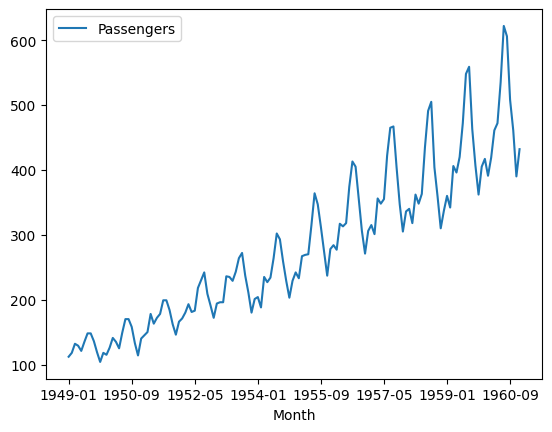

In [2]:
df.plot()

In [3]:
# df = df[['Passengers']]

# df.index.names = ['Month']

# df.sort_index(inplace=True)

# df.head()

In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
dataset = df.astype('float32')

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(dataset)

In [7]:
train_size = int(len(scaled) * 0.8)

test_size = len(scaled - train_size)

train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

print(len(train), len(test))

115 29


In [8]:
import numpy as np

def create_dataset(dataset, timestep):
    print(len(dataset), timestep)
    dataX, dataY = [], []
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]
        dataset[i + timestep, 0]
        dataX.append(a)
        dataY.append(dataset[i + timestep, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
timestep = 2

X_train, y_train = create_dataset(train, timestep)
X_test, y_test = create_dataset(test, timestep)

115 2
29 2


In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)    # (샘플수, 타임스텝, 변수개수)
print(X_test.shape)

(112, 2, 1)
(26, 2, 1)


In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)

model=Sequential()

model.add(SimpleRNN(units=20,input_shape=(timestep,1)))
#                   출력                  타임스텝, 변수개수
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
#                       회귀
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.1301
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0861
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0611
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0393
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0344
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0281
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0260
Epoch 13/100
4/4 [==============================] - 0s 7ms/st

In [13]:
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
#                     스케일링 => 원래
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

trainScore = np.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print(trainScore)

testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print(testScore)

1/1 [==============================] - 0s 19ms/step
37.185111241756985
105.36061210875974


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


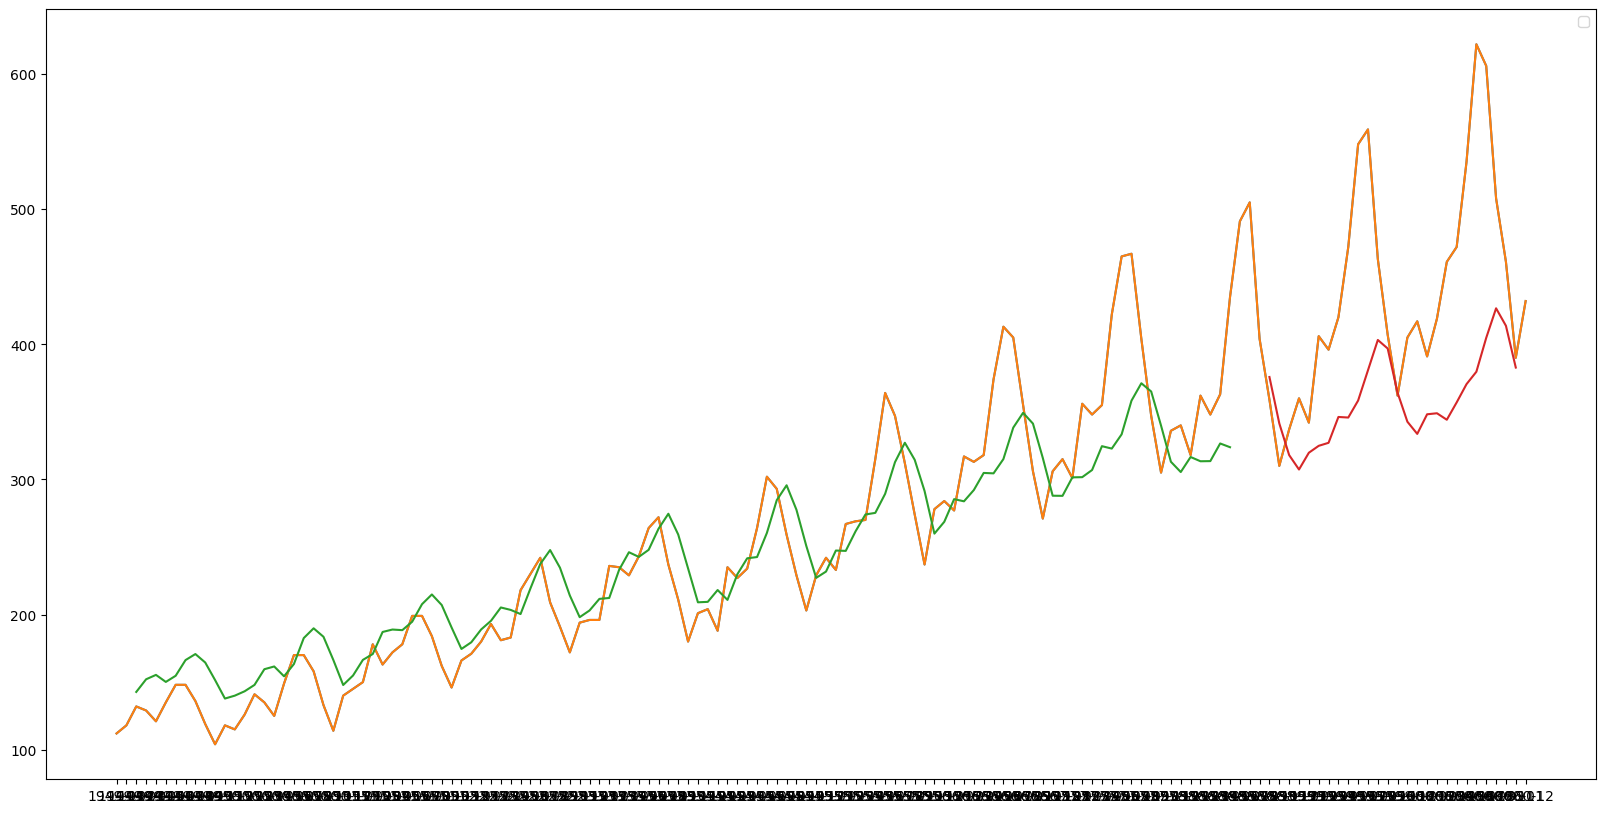

In [14]:
from matplotlib import pyplot as plt

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[timestep:len(trainPredict)+timestep, :] = trainPredict

testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan

testPredictPlot[len(trainPredict)+(timestep*2)+1:len(scaled)-1, :] = testPredict

plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()